## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
!nvidia-smi

Sun Nov  6 14:51:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#Mounting the Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/moulik/IBM.zip"

Archive:  /content/drive/MyDrive/Bala's Folder /Rice/RiceDiseaseDataset.zip
   creating: RiceDiseaseDataset/
  inflating: RiceDiseaseDataset/resize.py  
   creating: RiceDiseaseDataset/train/
   creating: RiceDiseaseDataset/train/BrownSpot/
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_095712.jpg  
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_095715.jpg  
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_095726.jpg  
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_095736.jpg  
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_100805.jpg  
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103247.jpg  
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103508.jpg  
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103510.jpg  
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103527.jpg  
  inflating: RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103531.jpg  
  inflating: RiceDi

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = '/content/RiceDiseaseDataset/train'
valid_path = '/content/RiceDiseaseDataset/validation'


In [30]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

from keras.applications.densenet import DenseNet121
inception = DenseNet121(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)




29084464/29084464 [==============================] - 0s 0us/step


In [31]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [32]:
  # useful for getting number of output classes
folders = glob('/content/RiceDiseaseDataset/validation/*')

In [34]:
#@title Default title text
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [35]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [36]:
print(len(folders))

4


In [37]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [38]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [39]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [40]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/RiceDiseaseDataset/train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1600 images belonging to 4 classes.


In [41]:
test_set = test_datagen.flow_from_directory('/content/RiceDiseaseDataset/validation',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 492 images belonging to 4 classes.


In [42]:
test_real = test_datagen.flow_from_directory('/content/RiceDiseaseDataset/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 492 images belonging to 4 classes.


In [43]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  verbose=1
)

Epoch 1/25
50/50 [==============================] - 30s 432ms/step - loss: 2.9744 - accuracy: 0.4162 - val_loss: 2.2344 - val_accuracy: 0.4492
Epoch 2/25
50/50 [==============================] - 20s 405ms/step - loss: 2.0255 - accuracy: 0.5394 - val_loss: 2.0729 - val_accuracy: 0.4858
Epoch 3/25
50/50 [==============================] - 19s 384ms/step - loss: 1.4869 - accuracy: 0.5956 - val_loss: 1.5687 - val_accuracy: 0.5589
Epoch 4/25
50/50 [==============================] - 19s 380ms/step - loss: 1.5204 - accuracy: 0.6187 - val_loss: 1.6063 - val_accuracy: 0.5467
Epoch 5/25
50/50 [==============================] - 19s 381ms/step - loss: 1.5491 - accuracy: 0.6425 - val_loss: 1.8486 - val_accuracy: 0.5549
Epoch 6/25
50/50 [==============================] - 19s 378ms/step - loss: 1.6041 - accuracy: 0.6319 - val_loss: 2.6458 - val_accuracy: 0.5142
Epoch 7/25
50/50 [==============================] - 19s 376ms/step - loss: 1.6218 - accuracy: 0.6369 - val_loss: 1.9657 - val_accuracy: 0.5630

In [44]:
import matplotlib.pyplot as plt

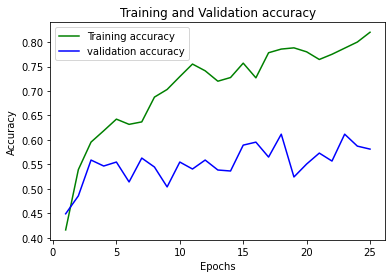

In [45]:
#plt.figure(figsize=[8,8])
loss_train = r.history['accuracy']
loss_val = r.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Accuracy Curves')

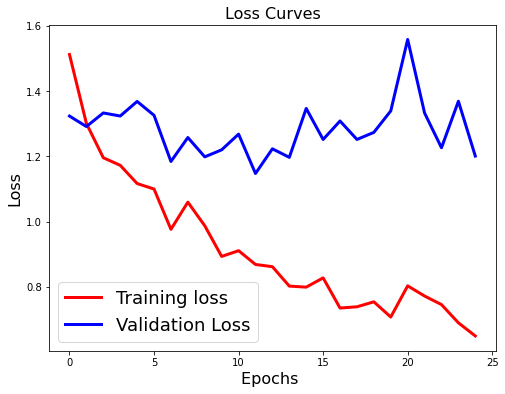

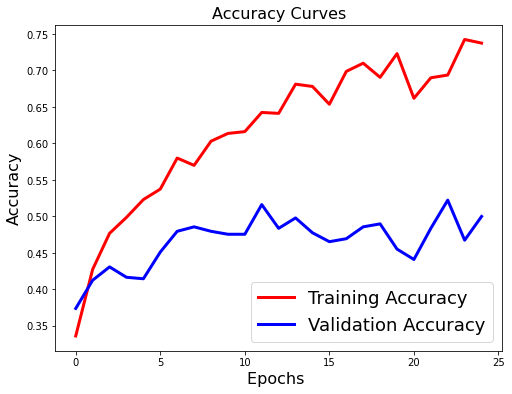

In [ ]:
#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(r.history['loss'],'r',linewidth=3.0)
plt.plot(r.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(r.history['accuracy'],'r',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [46]:
batch_size = 32

In [47]:
test_score = model.evaluate_generator(test_real, batch_size)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[INFO] accuracy: 58.13%
[INFO] Loss:  3.0753769874572754


In [48]:
Y_pred = model.predict(test_real, test_real.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
import sklearn.metrics as metrics
val_trues =test_real.classes
from sklearn.metrics import classification_report
print(classification_report(val_trues, val_preds))

16/16 [==============================] - 4s 91ms/step
              precision    recall  f1-score   support

           0       0.29      0.21      0.24       123
           1       0.24      0.41      0.30       123
           2       0.26      0.22      0.24       123
           3       0.22      0.15      0.18       123

    accuracy                           0.25       492
   macro avg       0.25      0.25      0.24       492
weighted avg       0.25      0.25      0.24       492



In [49]:
Y_pred = model.predict(test_set, test_set.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =test_set.classes
cm = metrics.confusion_matrix(val_trues, val_preds)
cm

16/16 [==============================] - 1s 90ms/step


array([[23, 57, 20, 23],
       [22, 51, 34, 16],
       [20, 55, 22, 26],
       [26, 50, 26, 21]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

   BrownSpot       0.20      0.15      0.17       123
     Healthy       0.25      0.43      0.32       123
       Hispa       0.27      0.23      0.25       123
   LeafBlast       0.21      0.15      0.17       123

    accuracy                           0.24       492
   macro avg       0.23      0.24      0.23       492
weighted avg       0.23      0.24      0.23       492



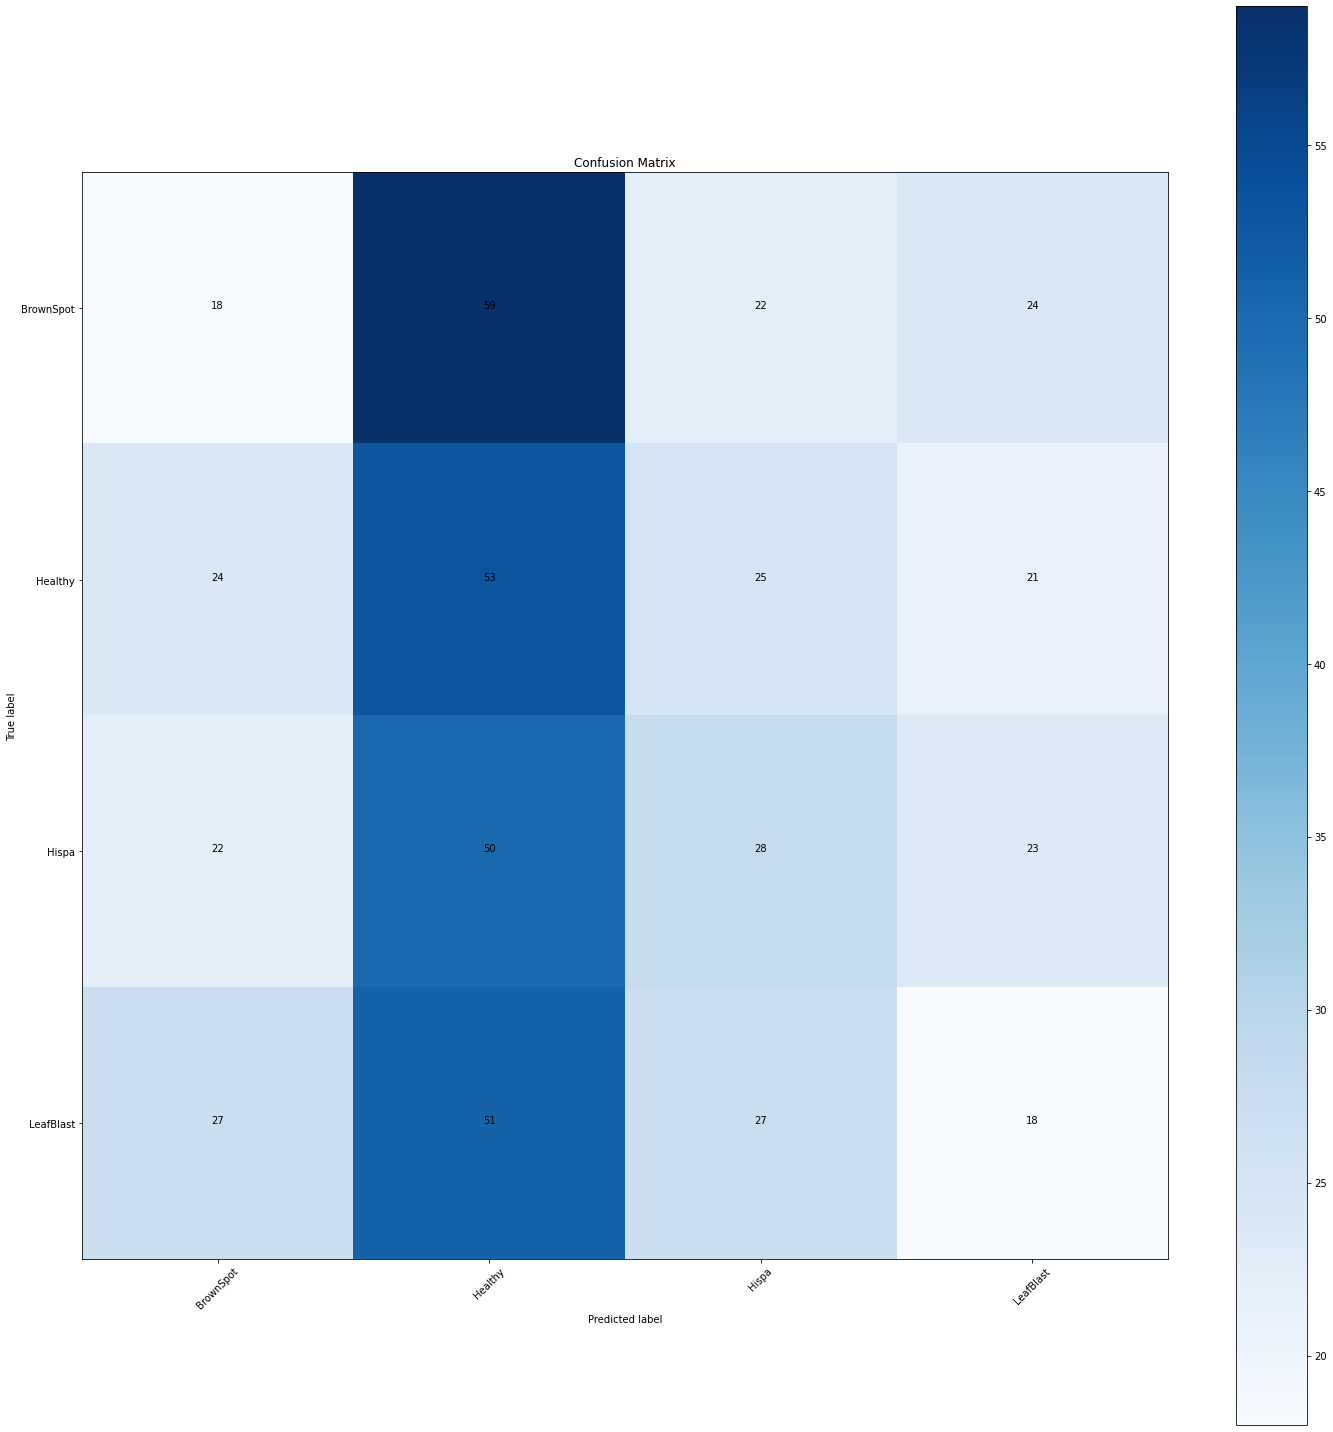

In [50]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="Black" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in training_set.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 

Y_pred = model.predict_generator(test_real)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_real.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(test_real.classes, y_pred, target_names=target_names))

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred)

#Defining the class labels
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[1.27309505e-23, 1.00000000e+00, 2.23429169e-23],
       [1.00000000e+00, 1.85932370e-22, 3.29499955e-22],
       [1.00000000e+00, 1.33570399e-09, 4.52088801e-16],
       ...,
       [3.09418460e-22, 1.00000000e+00, 3.67865765e-14],
       [3.36250405e-20, 6.90629690e-16, 1.00000000e+00],
       [6.15754739e-11, 7.63300795e-06, 9.99992371e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1,
       0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1,
       2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1,
       1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1,
       2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0,
       0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/model_inception.h5')

In [ ]:
x=image.img_to_array(img)
x

array([[[139.,  96.,  91.],
        [124.,  85.,  82.],
        [108.,  77.,  74.],
        ...,
        [ 89.,  69.,  65.],
        [153., 141., 138.],
        [222., 218., 215.]],

       [[139.,  95.,  90.],
        [123.,  83.,  81.],
        [111.,  80.,  76.],
        ...,
        [ 85.,  65.,  63.],
        [151., 140., 137.],
        [221., 215., 213.]],

       [[136.,  93.,  89.],
        [121.,  82.,  79.],
        [112.,  82.,  78.],
        ...,
        [ 86.,  66.,  63.],
        [152., 142., 138.],
        [222., 217., 215.]],

       ...,

       [[226., 198., 187.],
        [225., 197., 186.],
        [226., 197., 187.],
        ...,
        [212., 179., 167.],
        [212., 180., 167.],
        [212., 180., 167.]],

       [[226., 197., 187.],
        [226., 197., 186.],
        [225., 198., 187.],
        ...,
        [213., 180., 168.],
        [212., 180., 167.],
        [211., 179., 166.]],

       [[225., 197., 186.],
        [225., 197., 187.],
        [225., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[9.9926871e-01, 2.8039617e-04, 4.5090937e-04]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==0

array([ True])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'